# Dependable AI Project

## Predicting customer churn in a subscription-based business such as a telecom or an online streaming service with predictions based on explainable AI techniques.

    Ayush Abrol B20AI052
    Aryan Tiwari B20AI056

---

## Churn Prediction Model

### Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

### Loading the dataset

In [2]:
data = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Shape of the data

In [3]:
data.shape

(7043, 21)

### Checking for any null values

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.drop('customerID', axis=1, inplace=True)

In [6]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
columns = data.columns
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Stacked plots between two categorical variables

In [8]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

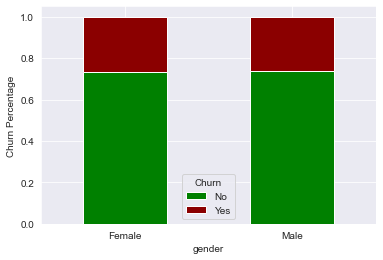

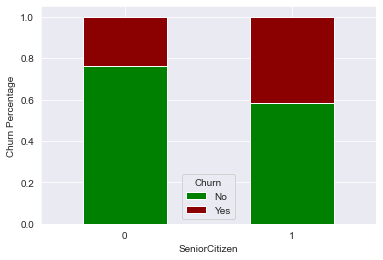

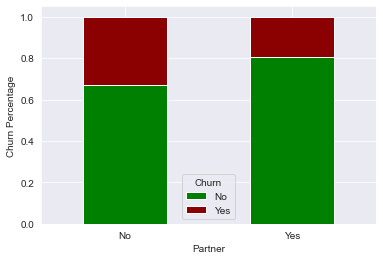

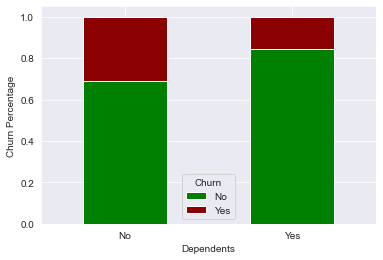

In [9]:
stacked_plot(data, "gender", "Churn")
stacked_plot(data, "SeniorCitizen", "Churn")
stacked_plot(data, "Partner", "Churn")
stacked_plot(data, "Dependents", "Churn")

#### From above plots, we can say following:
    
    - Gender alone does not help us predict the customer churn.
    - If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or some other factors.

In [10]:
print("Number of churned customers when they are not a senior Citizen, have a partner and have dependents: \n", data[(data.SeniorCitizen == 0) & (data.Partner == 'Yes') & (data.Dependents == 'Yes')].Churn.value_counts())
print("\nNumber of churned customers when they are not a senior Citizen, have a partner and have no dependents: \n", data[(data.SeniorCitizen == 0) & (data.Partner == 'Yes') & (data.Dependents == 'No')].Churn.value_counts())
print("\nNumber of churned customers when they are not a senior Citizen, have no partner and have dependents: \n", data[(data.SeniorCitizen == 0) & (data.Partner == 'No') & (data.Dependents == 'Yes')].Churn.value_counts())
print("\nNumber of churned customers when they are not a senior Citizen, have no partner and have no dependents: \n", data[(data.SeniorCitizen == 0) & (data.Partner == 'No') & (data.Dependents == 'No')].Churn.value_counts())

Number of churned customers when they are not a senior Citizen, have a partner and have dependents: 
 No     1437
Yes     229
Name: Churn, dtype: int64

Number of churned customers when they are not a senior Citizen, have a partner and have no dependents: 
 No     921
Yes    242
Name: Churn, dtype: int64

Number of churned customers when they are not a senior Citizen, have no partner and have dependents: 
 No     278
Yes     75
Name: Churn, dtype: int64

Number of churned customers when they are not a senior Citizen, have no partner and have no dependents: 
 No     1872
Yes     847
Name: Churn, dtype: int64


### Exploring the Tenure feature

Higher tenure might mean the less chances of churn from the service. The following plot shows the same.

In [11]:
data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [12]:
data['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

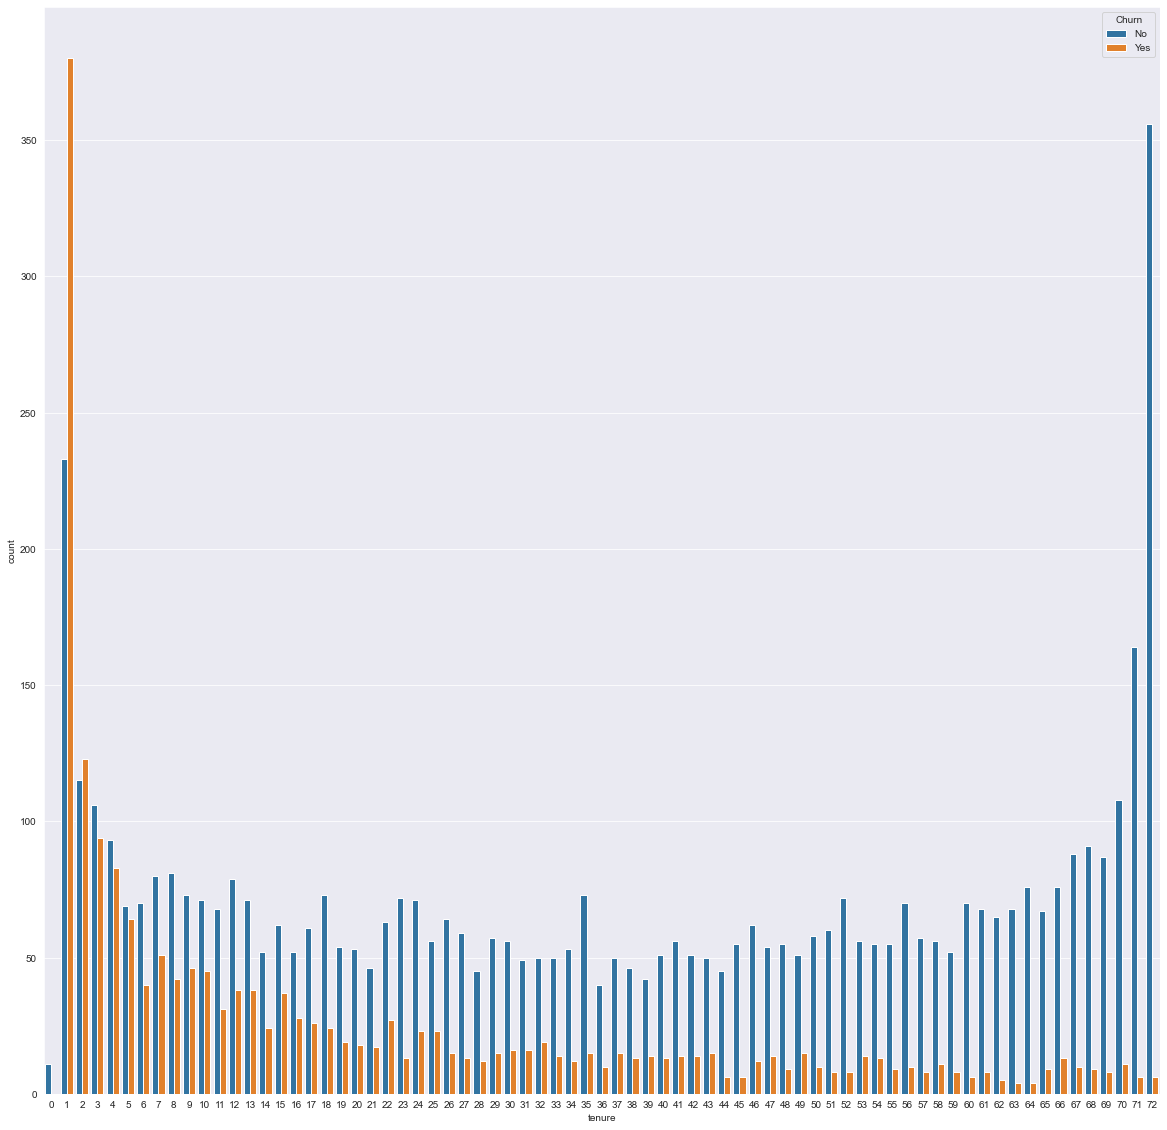

In [13]:
plt.figure(figsize=(20,20))
sns.countplot(x="tenure", hue="Churn", data=data)
plt.show()

### Reducing tenure to 5 categories to reduce model complexity

In [14]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

data["tenure_group"]=data["tenure"].apply(lambda x: tenure(x))

In [15]:
data["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

### Countplot of the tenure categories

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

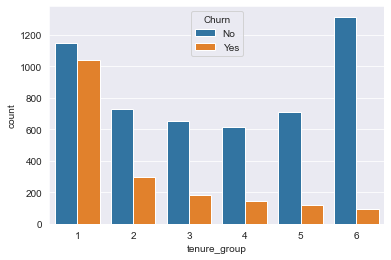

In [16]:
sns.countplot(x="tenure_group", hue="Churn", data=data)

### Features Phone Service and Multiple Lines

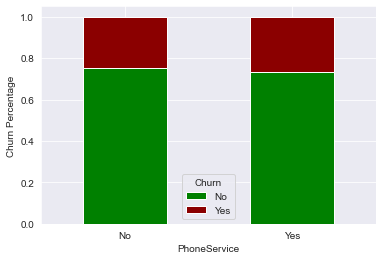

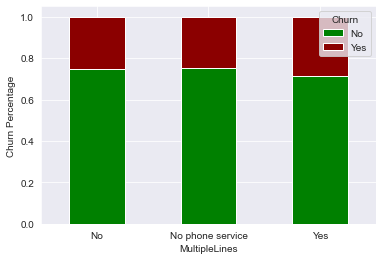

In [17]:
stacked_plot(data, "PhoneService", "Churn")
stacked_plot(data, "MultipleLines", "Churn")

#### From the above plots, we can say that

    - If a person has a phone service, he or she is less likely to stop the service.
    - If a person has multiple lines, he or she is more likely to stop the service.

### Other feature like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

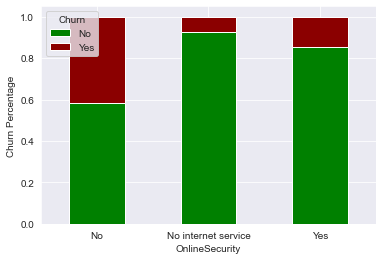

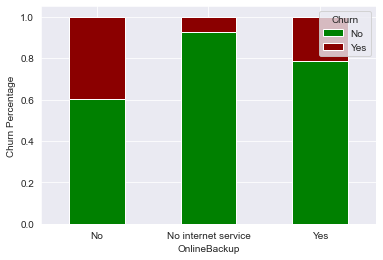

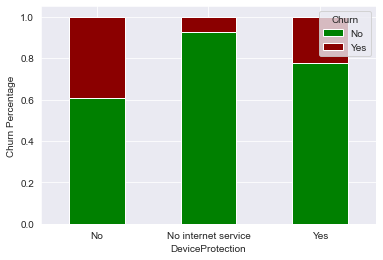

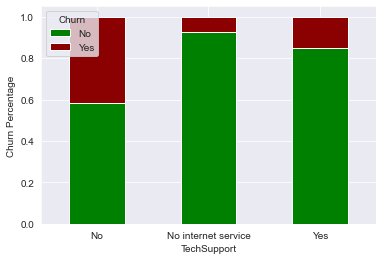

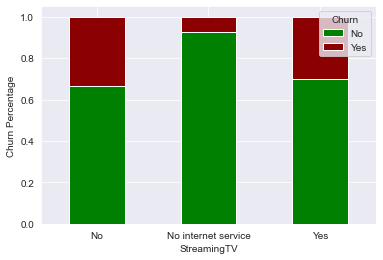

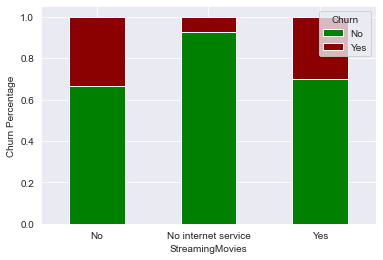

In [18]:
stacked_plot(data, "OnlineSecurity", "Churn")
stacked_plot(data, "OnlineBackup", "Churn")
stacked_plot(data, "DeviceProtection", "Churn")
stacked_plot(data, "TechSupport", "Churn")
stacked_plot(data, "StreamingTV", "Churn")
stacked_plot(data, "StreamingMovies", "Churn")

#### Here, we see consistent results. 

    - If a person does not opt for internet service, the customer churning is quite less. The reason behind this might be the less cost of the service. 
    - Also, if they have any internet service and does not opt for specific service then their probability of churning is high.

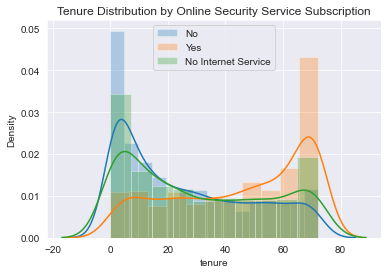

In [19]:
sns.distplot(data.tenure[data.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(data.tenure[data.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(data.tenure[data.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

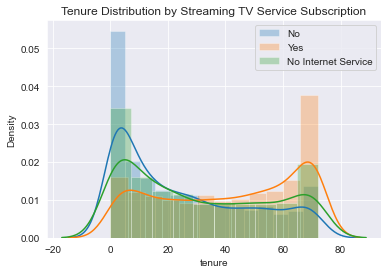

In [20]:
sns.distplot(data.tenure[data.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(data.tenure[data.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(data.tenure[data.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

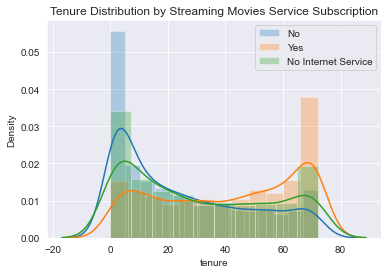

In [21]:
sns.distplot(data.tenure[data.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(data.tenure[data.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(data.tenure[data.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

#### We can observe that when the customers are new, they do not opt for various services and their churning rate is very high.

### Exploring the feature InternetService

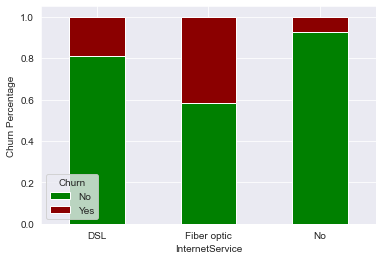

In [22]:
stacked_plot(data, "InternetService", "Churn")

#### When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides higher speed as compared to a DSL. The reason might be the higher cost of fiber optics.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

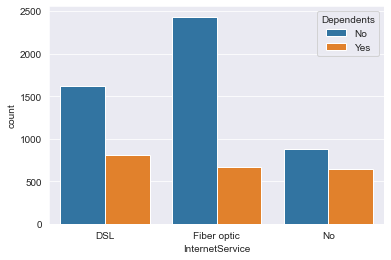

In [23]:
sns.countplot(x="InternetService", hue="Dependents", data=data)

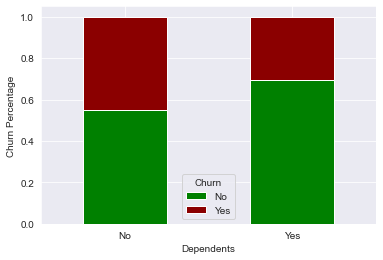

In [24]:
stacked_plot(data[data.InternetService == "Fiber optic"], "Dependents", "Churn")

#### Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

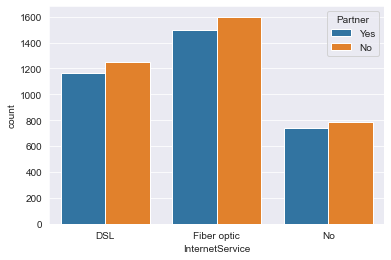

In [25]:
sns.countplot(x="InternetService", hue="Partner", data=data)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

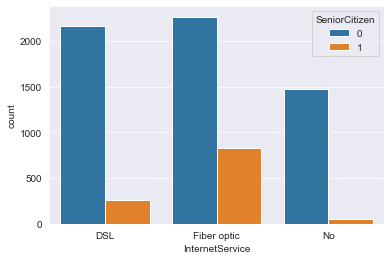

In [26]:
sns.countplot(x="InternetService", hue="SeniorCitizen", data=data)

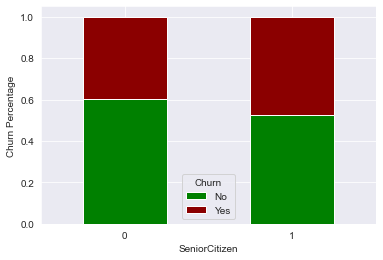

In [27]:
stacked_plot(data[data.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

#### As we can see from above, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

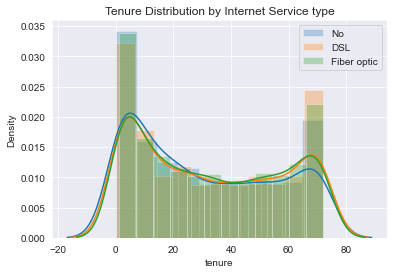

In [28]:
sns.distplot(data.tenure[data.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(data.tenure[data.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(data.tenure[data.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

#### Also, the tenure distribution of the customers with different internet services is similar.

### Exploring the feature Contract

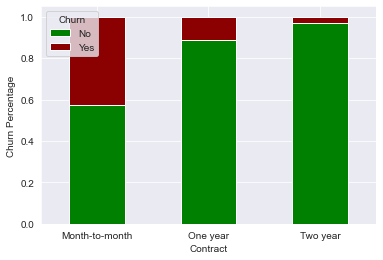

In [29]:
stacked_plot(data, "Contract", "Churn")

#### Observations:
    
    - In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

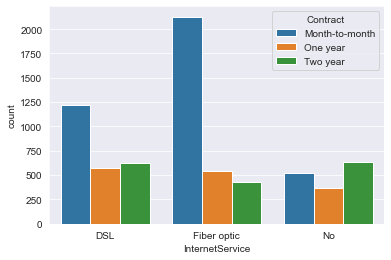

In [30]:
sns.countplot(x="InternetService", hue="Contract", data=data)

#### Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### Exploring the feature PaymentMethod

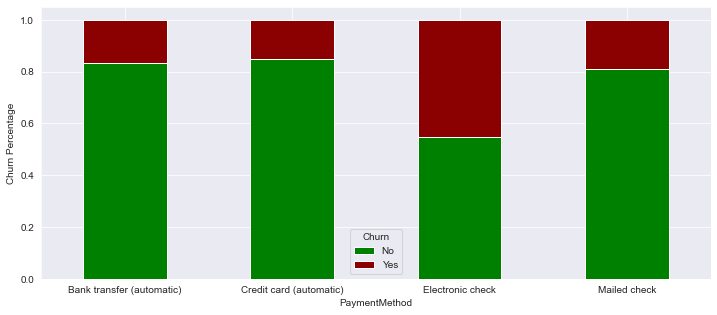

In [31]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (data.groupby([group, target]).size()/data.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

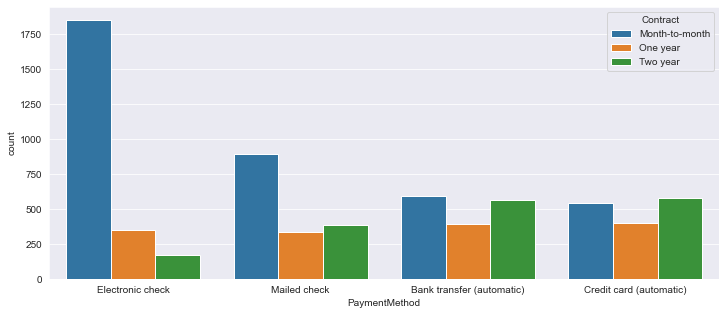

In [32]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x="PaymentMethod", hue = "Contract", data=data, ax = ax)

#### Observations:

    - Customers who pay through Electronic Check have higher churn rate.
    - People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment. 

### Paperless Billing Feature

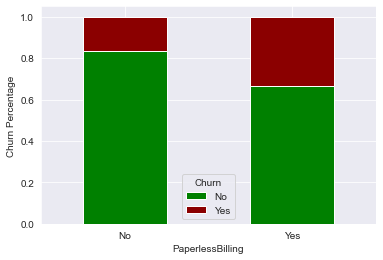

In [33]:
stacked_plot(data, "PaperlessBilling", "Churn")

### TotalCharges feature 

In [34]:
data.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [35]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)
data['TotalCharges'].isna().sum() 

11

In [36]:
data[data["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


#### All the customers having tenure = 0 are having null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [37]:
data.loc[data["TotalCharges"].isnull(), 'TotalCharges'] = 0
data.isnull().any().any()

False

In [38]:
data['TotalCharges'] = data["TotalCharges"].astype(float)

Churn = data[data.Churn=="Yes"]
Not_Churn = data[data.Churn=="No"]

Text(0.5, 0, 'Total Charges')

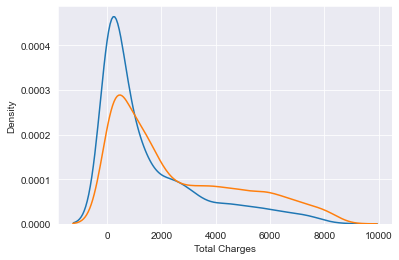

In [39]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges")

#### The density of total charges for churning customers are high around 0 (TotalCharges). This is due to the reason that many customers cancel the subsription in 1-2 months.

### MonthlyCharges feature

In [40]:
data.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [41]:
data.MonthlyCharges.isna().sum()

0

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

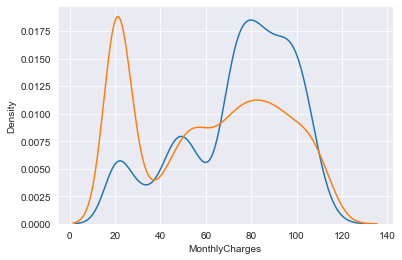

In [42]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

#### Observations:

    - The customers paying high monthly fees churn more.
    - Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [43]:
print("Correlation between Monthly Charges and Tenure: \n")
np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)

Correlation between Monthly Charges and Tenure: 



array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

### Data Preprocessing Function for the model building based on the Exloratory Data Analysis done

In [44]:
def datapreparation(filepath):
    
    data = pd.read_csv(filepath)
    data.drop(["customerID"], inplace = True, axis = 1)
    
    data.TotalCharges = data.TotalCharges.replace(" ",np.nan)
    data.TotalCharges.fillna(0, inplace = True)
    data.TotalCharges = data.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        data[col] = data[col].apply(lambda x: 0 if x == "No" else 1)
   
    data.gender = data.gender.apply(lambda x: 0 if x == "Male" else 1)
    data.MultipleLines = data.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        data[col] = data[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return data

### Preprocessed Dataset

In [45]:
data = datapreparation("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


### Preparing models

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, datasets, models, utils
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

In [47]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 42)
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

Train data shape:  (4930, 24)
Test data shape:  (2113, 24)


In [48]:
X_train = train_data.drop(["Churn"], axis = 1)
y_train = train_data["Churn"]

X_test = test_data.drop(["Churn"], axis = 1)
y_test = test_data["Churn"]

In [49]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4930, 23)
y_train shape:  (4930,)
X_test shape:  (2113, 23)
y_test shape:  (2113,)


In [50]:
X_train_tensors = torch.tensor(X_train.values).float()
y_train_tensors = torch.tensor(y_train.values).float()
X_test_tensors = torch.tensor(X_test.values).float()
y_test_tensors = torch.tensor(y_test.values).float()

In [51]:
train_dataset = TensorDataset(X_train_tensors, y_train_tensors)
test_dataset = TensorDataset(X_test_tensors, y_test_tensors)

train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = True)

In [52]:
class MLPClassifier_Scratch(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPClassifier_Scratch, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        out = F.sigmoid(self.fc3(x))
        return out
    
    def predict(self, x):
        pred = self.forward(x)
        return pred

In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [54]:
model = MLPClassifier_Scratch(input_dim = 23, hidden_dim = 64, output_dim = 1)
model

MLPClassifier_Scratch(
  (fc1): Linear(in_features=23, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [55]:
def train_mlp(model, train_loader, criterion, optimizer, epochs = 15):
    train_losses = []
    train_acc = []
    for epoch in range(epochs):  
        running_loss = 0.0
        correct = 0
        total = 0   
        for i, data in enumerate(train_loader):        
            inputs, labels = data 
            # inputs, labels = inputs.to(device), labels.to(device)         
            optimizer.zero_grad()         
            outputs = model(inputs)         
            loss = criterion(outputs, labels.unsqueeze(1))          
            loss.backward()         
            optimizer.step()        
            running_loss += loss.item()        
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels.unsqueeze(1)).sum().item()
            
        train_losses.append(running_loss/len(train_loader))
        train_acc.append(correct/total)
        
        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Training Accuracy: {:.3f}".format(train_acc[-1]))
        
    return train_losses, train_acc

In [56]:
def test_mlp(model, test_loader, criterion):
    test_losses = []
    test_acc = []
    predictions = []
    probabilities = []
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            # inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            test_loss = criterion(outputs, labels.unsqueeze(1))
            test_losses.append(test_loss.item())
            predicted = torch.round(outputs)
            total = labels.size(0)
            correct = (predicted == labels.unsqueeze(1)).sum().item()
            test_acc.append(correct/total)
            predictions.append(predicted)
            probabilities.append(outputs)
    print("Test Loss: {:.3f}.. ".format(np.mean(test_losses)),
          "Test Accuracy: {:.3f}".format(np.mean(test_acc)))
    
    return test_losses, test_acc, predictions, probabilities

In [57]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [254]:
train_losses, train_acc = train_mlp(model, train_loader, criterion, optimizer, epochs = 100)

Epoch: 1/100..  Training Loss: 8.003..  Training Accuracy: 0.686
Epoch: 2/100..  Training Loss: 4.093..  Training Accuracy: 0.674
Epoch: 3/100..  Training Loss: 1.035..  Training Accuracy: 0.699
Epoch: 4/100..  Training Loss: 0.617..  Training Accuracy: 0.753
Epoch: 5/100..  Training Loss: 0.577..  Training Accuracy: 0.759
Epoch: 6/100..  Training Loss: 0.565..  Training Accuracy: 0.763
Epoch: 7/100..  Training Loss: 0.567..  Training Accuracy: 0.766
Epoch: 8/100..  Training Loss: 0.559..  Training Accuracy: 0.762
Epoch: 9/100..  Training Loss: 0.555..  Training Accuracy: 0.762
Epoch: 10/100..  Training Loss: 0.549..  Training Accuracy: 0.765
Epoch: 11/100..  Training Loss: 0.545..  Training Accuracy: 0.764
Epoch: 12/100..  Training Loss: 0.545..  Training Accuracy: 0.767
Epoch: 13/100..  Training Loss: 0.544..  Training Accuracy: 0.768
Epoch: 14/100..  Training Loss: 0.535..  Training Accuracy: 0.763
Epoch: 15/100..  Training Loss: 0.535..  Training Accuracy: 0.768
Epoch: 16/100..  Tr

In [58]:
#load the model
model.load_state_dict(torch.load('./models/mlp_model_scratch.pt'))

<All keys matched successfully>

In [59]:
test_losses, test_acc, predictions, probabilities = test_mlp(model, test_loader, criterion)

Test Loss: 0.422..  Test Accuracy: 0.798


In [256]:
predictions = [x for x in predictions]
probabilities = [x for x in probabilities]

In [257]:
# torch.save(model.state_dict(), "./models/mlp_model_scratch.pt")

In [258]:
print("CLassification Report using Scratch model: \n", classification_report(y_test_tensors, torch.round(torch.cat(predictions))))

CLassification Report using Scratch model: 
               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      1539
         1.0       0.26      0.15      0.19       574

    accuracy                           0.65      2113
   macro avg       0.49      0.49      0.48      2113
weighted avg       0.60      0.65      0.62      2113



In [259]:
print("Accuracy Score: ", accuracy_score(y_test_tensors, torch.round(torch.cat(predictions))))

Accuracy Score:  0.65309985802177


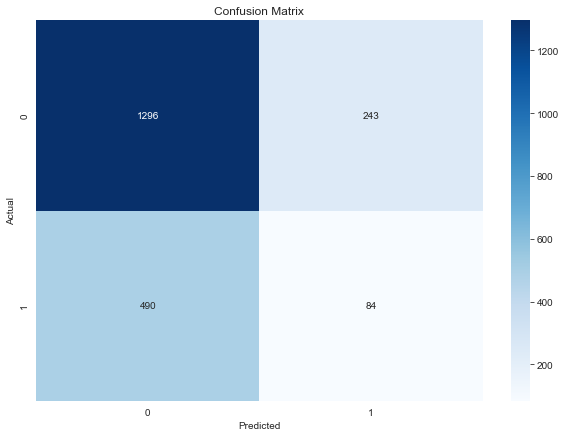

In [260]:
cm = confusion_matrix(y_test_tensors, torch.round(torch.cat(predictions)))
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = ".0f", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC AUC Score:  0.4967001967429867


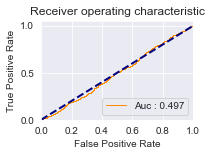

In [261]:
model_roc_auc = roc_auc_score(y_test_tensors, torch.cat(probabilities))
print("ROC AUC Score: ", model_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test_tensors, torch.cat(probabilities))

plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [60]:
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    if cf == "coefficients":
        coefficients = pd.DataFrame(np.concatenate([coef.ravel() for coef in algo.coefs_]))
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    model_roc_auc = roc_auc_score(testing_y,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    plt.savefig('./plots/feature_importance')
    plt.show()

In [67]:
model_mlp = MLPClassifier(hidden_layer_sizes = (64, 128), max_iter = 1000)
model_mlp

MLPClassifier(hidden_layer_sizes=(64, 128), max_iter=1000)

In [68]:
# Show the model parameters
model_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (64, 128),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [69]:
cols = X_train.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

MLPClassifier(hidden_layer_sizes=(64, 128), max_iter=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1539
           1       0.54      0.70      0.61       574

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.78      0.76      0.77      2113

Accuracy   Score :  0.7576904874585897
Area under curve :  0.7824303305689699 



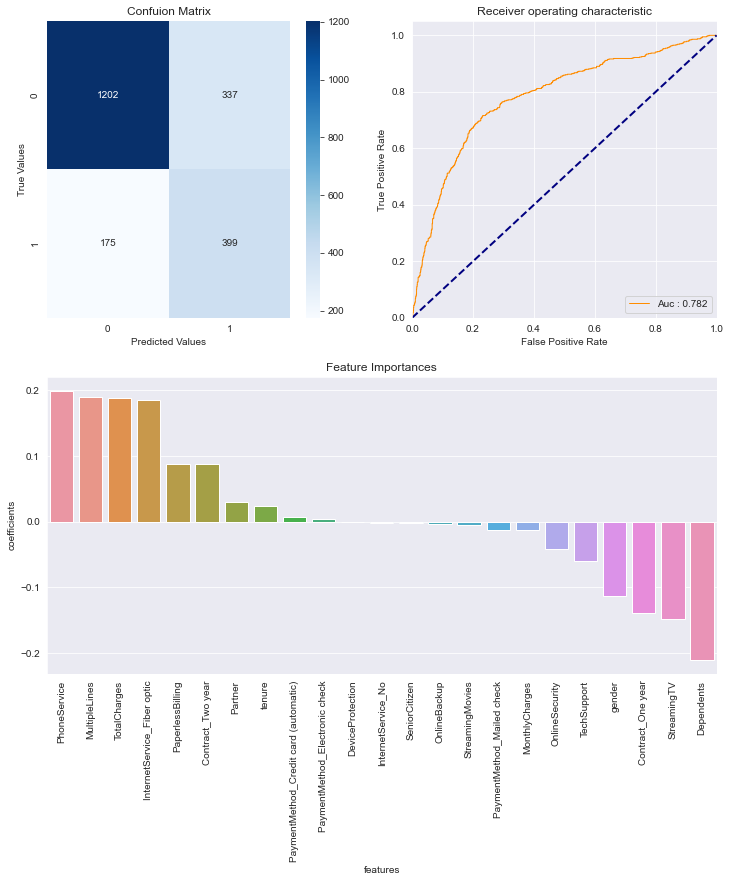

In [70]:
churn_prediction(model_mlp, X_train, y_train, X_test, y_test, cols, cf = 'coefficients')

#### From the above feature importance plot, we can see which features govern the customer churn.

### Checking model's performance on the train data itself

In [292]:
train_scores = cross_val_score(model_mlp, X_train, y_train, cv = 5, scoring = "accuracy")
train_scores

array([0.80324544, 0.77281947, 0.79006085, 0.60243408, 0.74340771])

In [293]:
f1_scores = cross_val_score(model_mlp, X_train, y_train, cv = 5, scoring = "f1")
f1_scores

array([0.48717949, 0.40214477, 0.52587992, 0.55508475, 0.27129338])

In [71]:
import pickle
# pickle.dump(model_mlp, open('./models/mlp_model.pkl', 'wb'))

In [72]:
model_mlp = pickle.load(open('./models/mlp_model.pkl', 'rb'))

### Predicting churn percentage on Random Forest Classifier (Explainable) model

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, min_samples_split=8, n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1539
           1       0.62      0.67      0.64       574

    accuracy                           0.80      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.80      0.80      2113

Accuracy   Score :  0.7969711310932324
Area under curve :  0.8596219546155361 



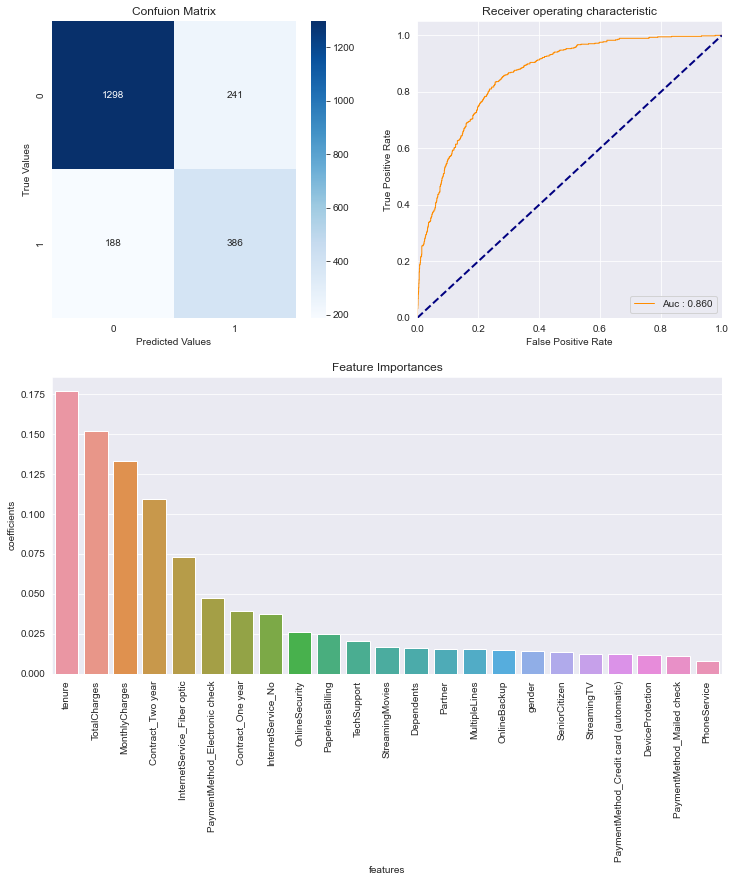

In [74]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
churn_prediction(model_rf, X_train, y_train, X_test, y_test, cols, cf = 'features')

In [75]:
# Saving the model
# pickle.dump(model_rf, open('./models/model_rfc.pkl', 'wb'))

In [76]:
# Loading the model
model_rf = pickle.load(open('./models/model_rfc.pkl', 'rb'))
model_rf

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, min_samples_split=8, n_estimators=1000)

### Explainibility of the model

In [306]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots

### For MLP

In [318]:
perm = PermutationImportance(model_mlp, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0430 ± 0.0082,tenure
0.0369 ± 0.0041,TotalCharges
0.0207 ± 0.0074,MonthlyCharges
0.0030 ± 0.0021,Contract_One year
0.0028 ± 0.0041,Contract_Two year
0.0025 ± 0.0021,PhoneService
0.0020 ± 0.0018,InternetService_No
0.0020 ± 0.0024,SeniorCitizen
0.0014 ± 0.0056,PaymentMethod_Mailed check
0.0010 ± 0.0023,TechSupport


### For Random Forest Classifier

In [373]:
perm = PermutationImportance(model_rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0213 ± 0.0129,InternetService_Fiber optic
0.0130 ± 0.0106,tenure
0.0072 ± 0.0112,Contract_Two year
0.0068 ± 0.0059,PaperlessBilling
0.0060 ± 0.0040,MonthlyCharges
0.0047 ± 0.0027,Contract_One year
0.0045 ± 0.0040,InternetService_No
0.0032 ± 0.0026,PaymentMethod_Mailed check
0.0030 ± 0.0052,TotalCharges
0.0026 ± 0.0075,PaymentMethod_Electronic check


Visualizing how the partial dependance plots look for top features

### Internet Service: Fiber Optic

#### For MLP

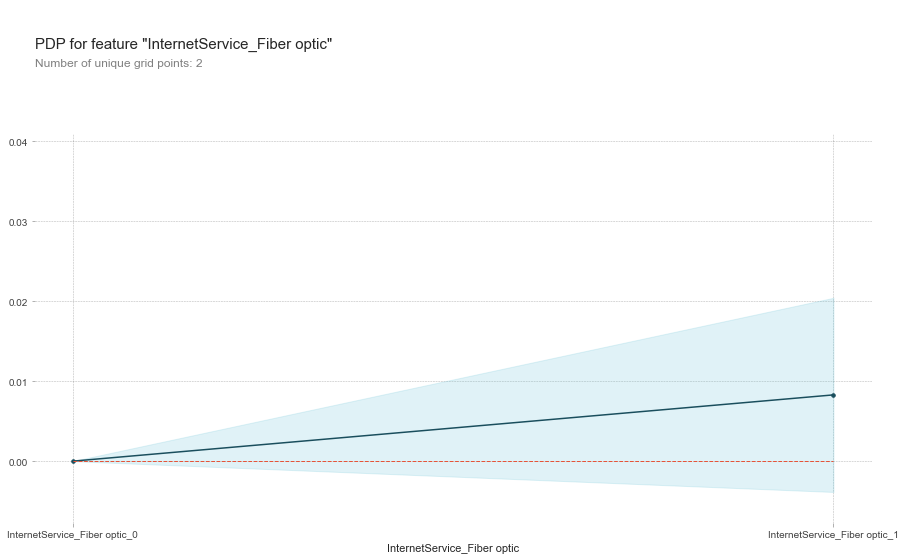

In [320]:
pdp_p = pdp.pdp_isolate(model=model_mlp, dataset=X_test, model_features=X_test.columns.values, 
                        feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

#### For Random Forest Classifier

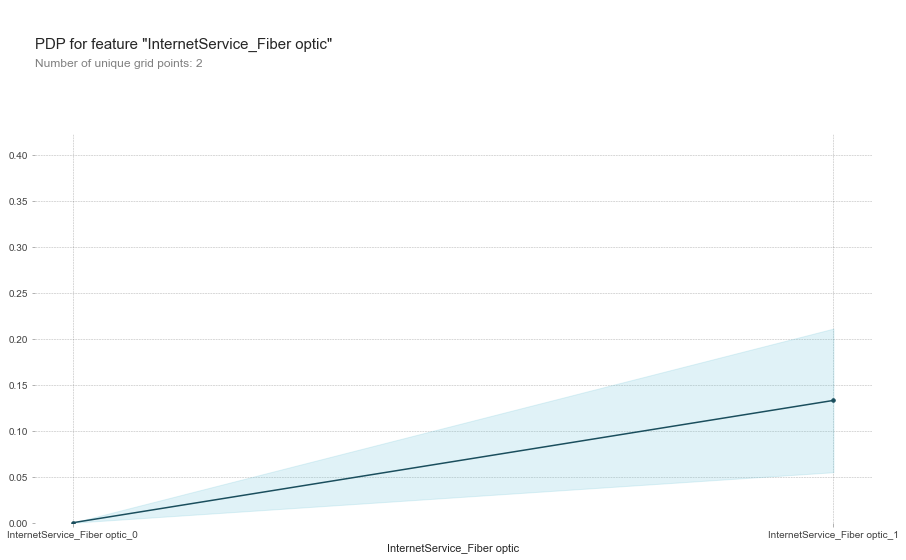

In [374]:
pdp_p = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns.values,
                        feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

### Payment Method: Mailed Check

#### For MLP

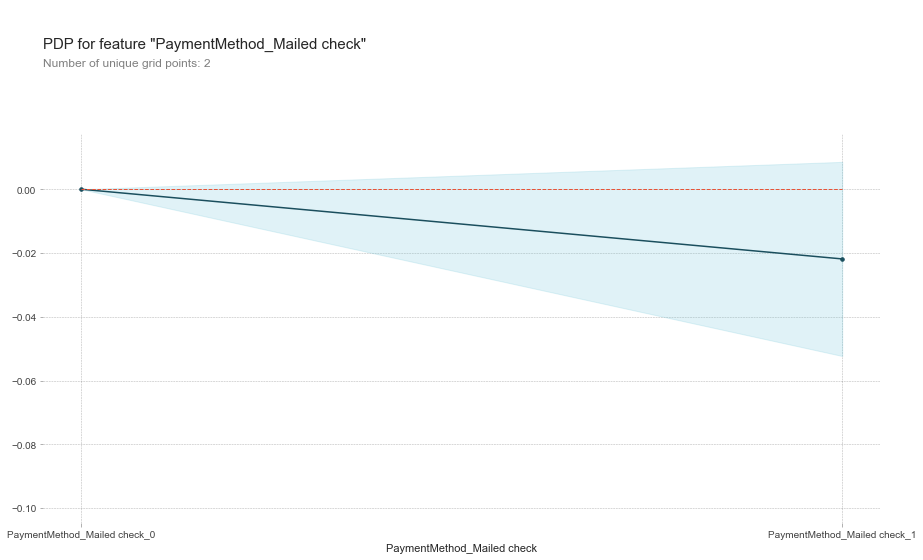

In [321]:
pdp_p = pdp.pdp_isolate(model=model_mlp, dataset=X_test, model_features=X_test.columns.values, 
                        feature='PaymentMethod_Mailed check')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Mailed check')
plt.show()

#### For Random Forest Classifier

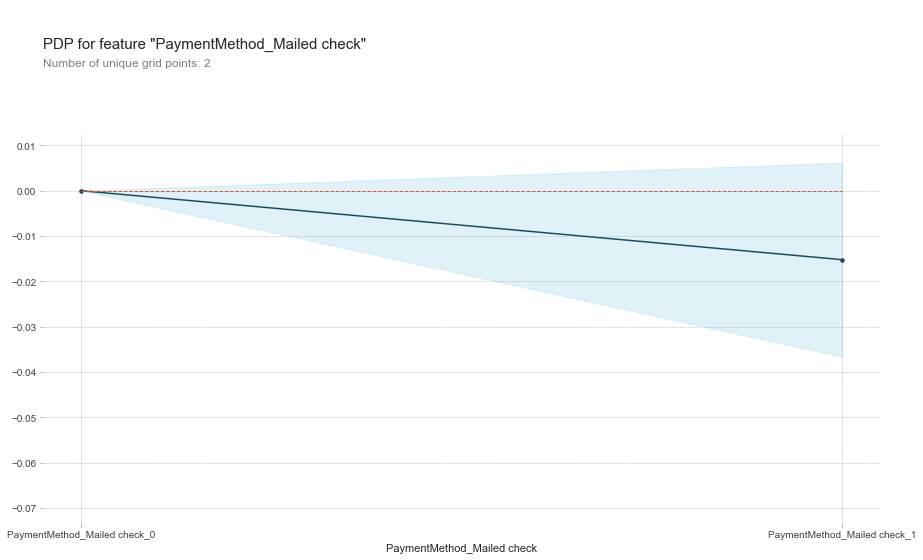

In [375]:
pdp_p = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns.values, 
                        feature='PaymentMethod_Mailed check')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Mailed check')
plt.show()

### Monthly Charges

#### For MLP

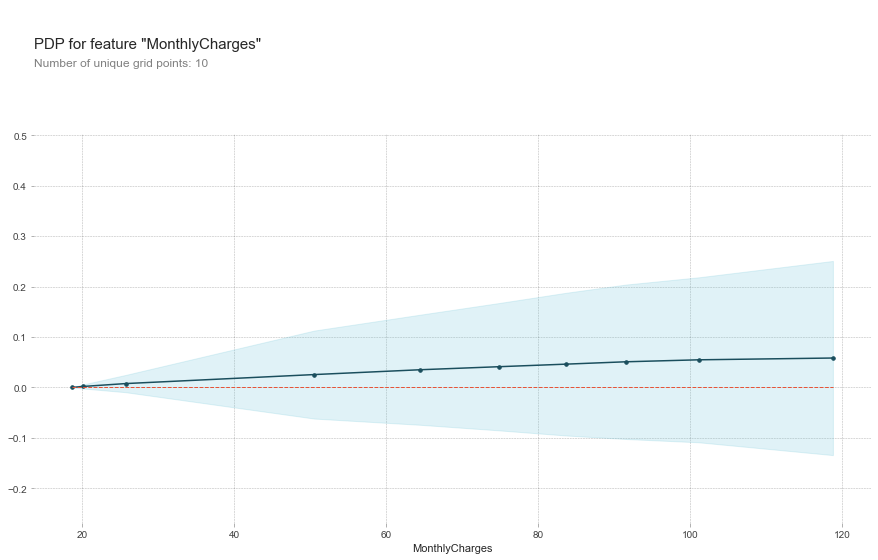

In [322]:
pdp_p = pdp.pdp_isolate(model=model_mlp, dataset=X_test, model_features=X_test.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

#### For Random Forest Classifier

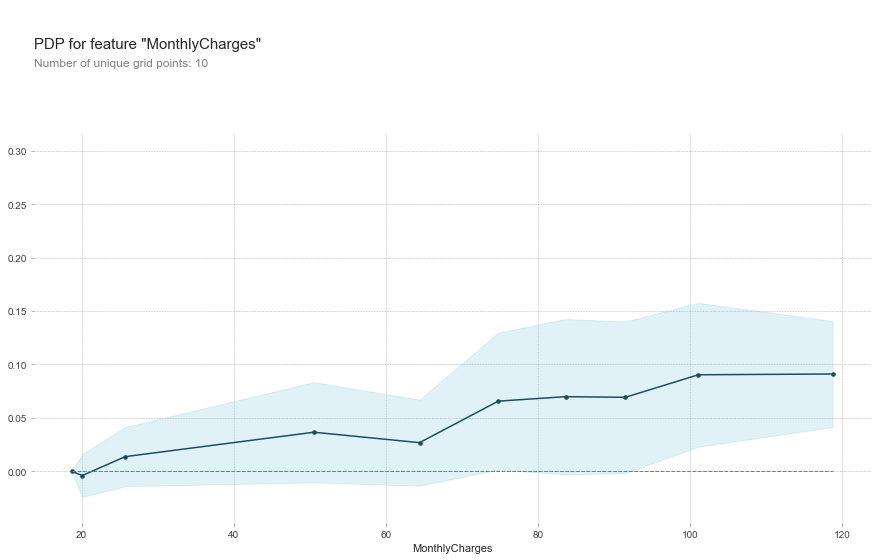

In [376]:
pdp_p = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

### Total Charges

#### For MLP

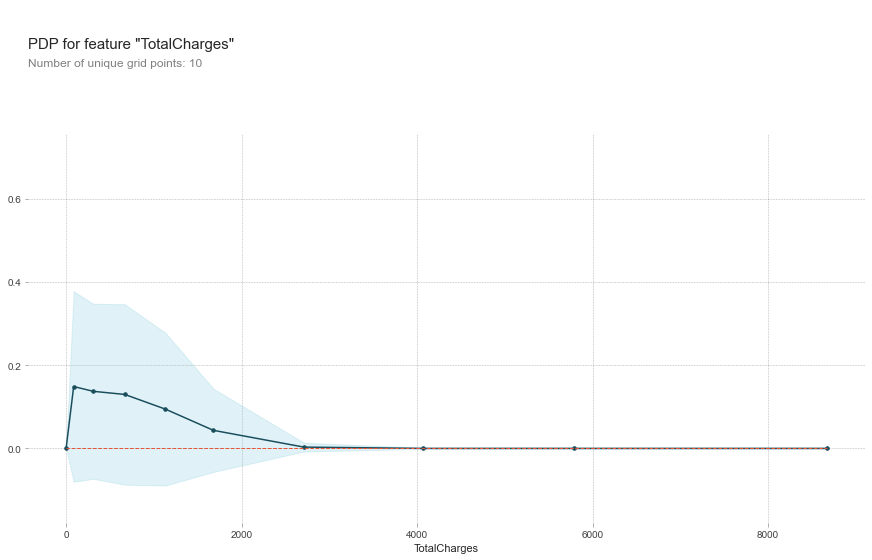

In [323]:
pdp_p = pdp.pdp_isolate(model=model_mlp, dataset=X_test, model_features=X_test.columns.values, feature='TotalCharges')
pdp.pdp_plot(pdp_p, 'TotalCharges')
plt.show()

#### For Random Forest Classifier

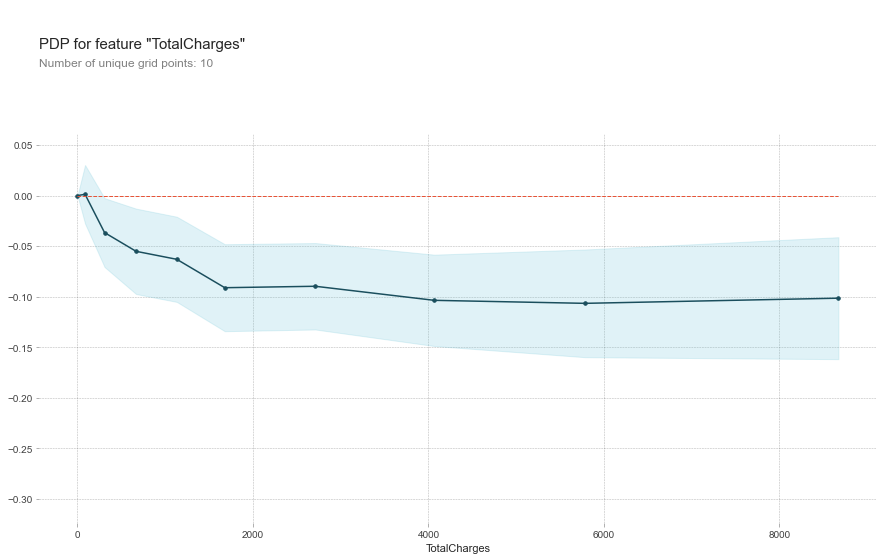

In [377]:
pdp_p = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns.values, feature='TotalCharges')
pdp.pdp_plot(pdp_p, 'TotalCharges')
plt.show()

### Contract: Two Years

#### For MLP

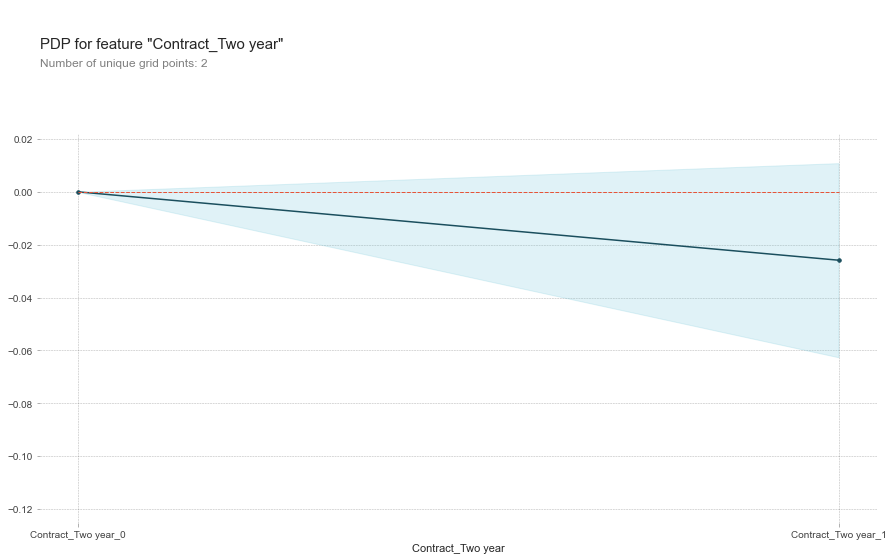

In [324]:
pdp_p = pdp.pdp_isolate(model=model_mlp, dataset=X_test, model_features=X_test.columns.values, 
                        feature='Contract_Two year')
pdp.pdp_plot(pdp_p, 'Contract_Two year')
plt.show()

#### For Random Forest Classifier

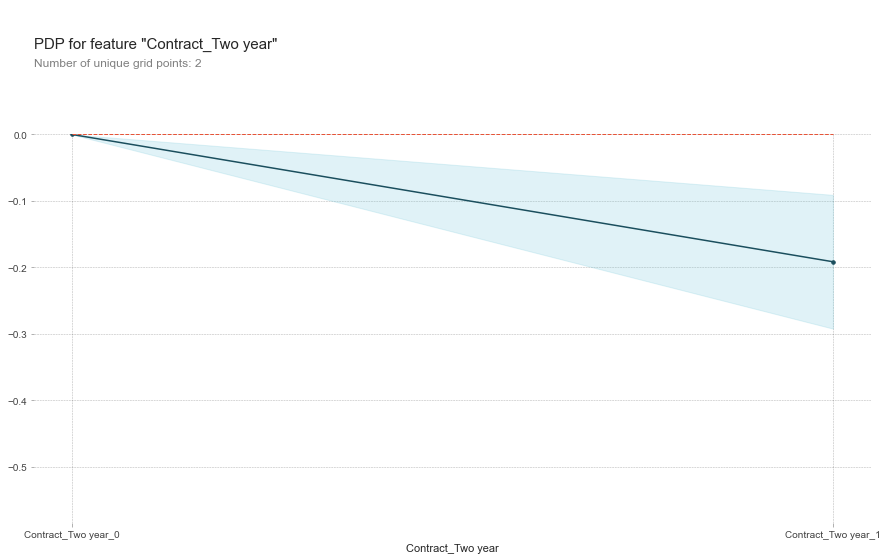

In [378]:
pdp_p = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns.values, 
                        feature='Contract_Two year')
pdp.pdp_plot(pdp_p, 'Contract_Two year')
plt.show()

### Tenure

#### For MLP

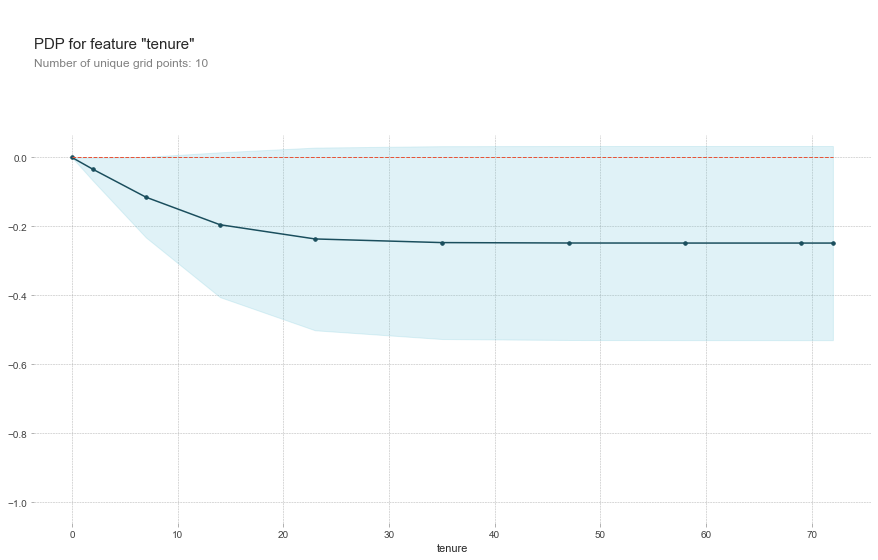

In [325]:
pdp_p = pdp.pdp_isolate(model=model_mlp, dataset=X_test, model_features=X_test.columns.values, 
                        feature='tenure')
pdp.pdp_plot(pdp_p, 'tenure')
plt.show()

#### For Random Forest Classifier

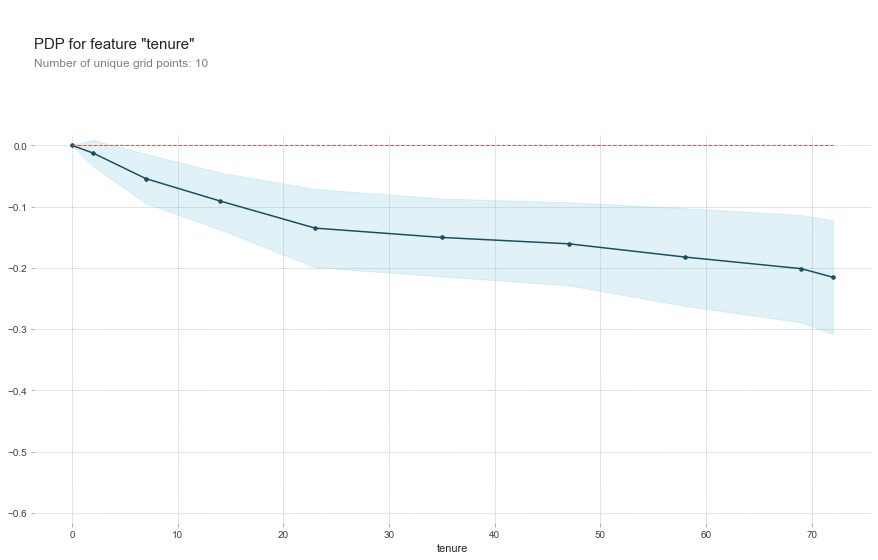

In [379]:
pdp_p = pdp.pdp_isolate(model=model_rf, dataset=X_test, model_features=X_test.columns.values, 
                        feature='tenure')
pdp.pdp_plot(pdp_p, 'tenure')
plt.show()

### Shap Values

In [326]:
import shap 
shap.initjs()

In [359]:
explainer_rfc = shap.TreeExplainer(model_rf)
shap_values_rfc = explainer_rfc.shap_values(X_test.iloc[0])

shap.force_plot(explainer_rfc.expected_value[1], shap_values_rfc[1], X_test.iloc[0])

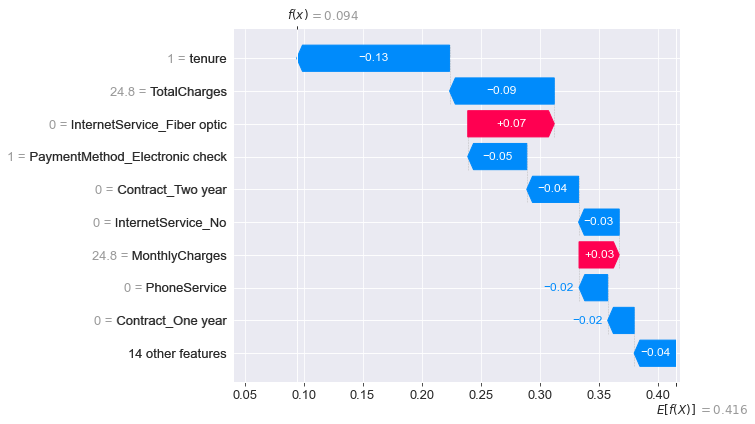

In [360]:
shap_exp_rfc = shap.Explanation(
    values=shap_values_rfc[0],
    base_values=explainer_rfc.expected_value[1],
    data=X_test.iloc[0],
    feature_names=X_test.columns
)

shap.plots.waterfall(shap_exp_rfc)

In [380]:
background = shap.sample(X_train, 2000)
explainer_mlp = shap.KernelExplainer(model_mlp.predict_proba, background)
# calculate SHAP values for a specific instance
shap_values_mlp = explainer_mlp.shap_values(X_test.iloc[0])

# plot SHAP values for the same instance
shap.force_plot(explainer_mlp.expected_value[1], shap_values_mlp[1], X_test.iloc[0])

Using 2000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


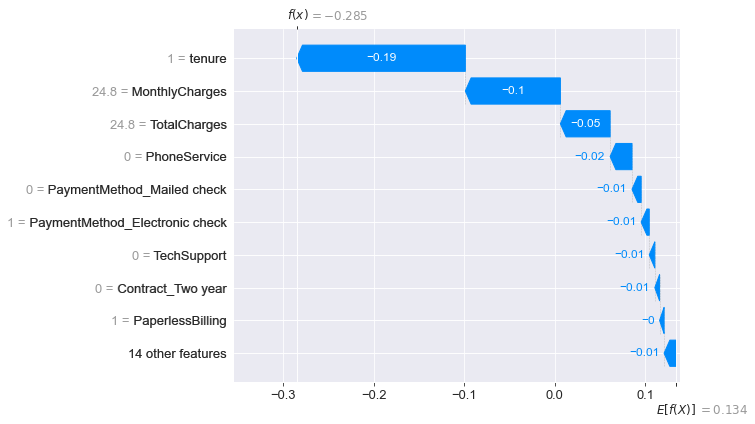

In [381]:
shap_exp_mlp = shap.Explanation(
    values=shap_values_mlp[0],
    base_values=explainer_mlp.expected_value[1],
    data=X_test.iloc[0],
    feature_names=X_test.columns
)

shap.plots.waterfall(shap_exp_mlp)

In [382]:
# Saving both the explainers
ex_rfc_filename = './models/explainer_rfc.bz2'
ex_mlp_filename = './models/explainer_mlp.bz2'

joblib.dump(explainer_rfc, filename=ex_rfc_filename, compress=('bz2', 9))
joblib.dump(explainer_mlp, filename=ex_mlp_filename, compress=('bz2', 9))

['./models/explainer_mlp.bz2']

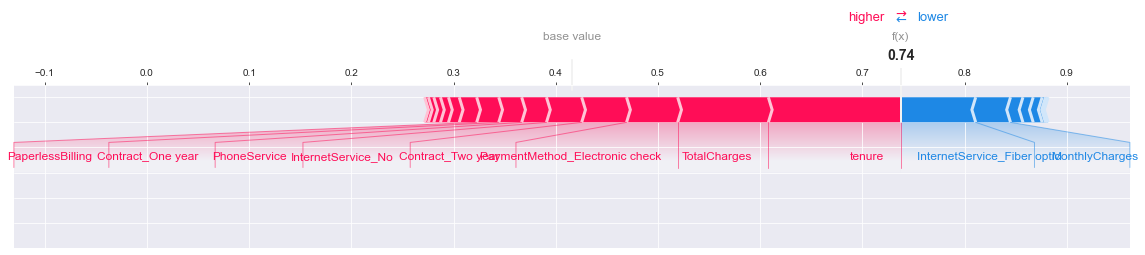

In [383]:
explainer_rfc = joblib.load(filename="./models/explainer_rfc.bz2")
shap_values_rfc = explainer_rfc.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer_rfc.expected_value[1], shap_values_rfc[1], list(X_test.columns), matplotlib = True, show = False).savefig('./plots/shap_rfc.png', bbox_inches="tight")    

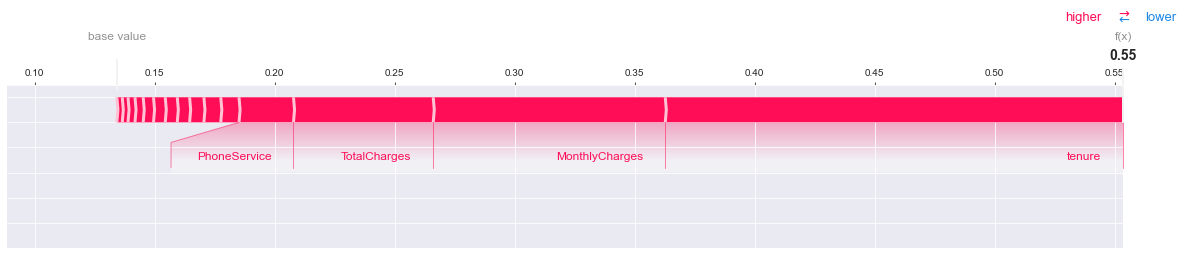

In [384]:
explainer_mlp = joblib.load(filename="./models/explainer_mlp.bz2")
shap_values_mlp = explainer_mlp.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer_mlp.expected_value[1], shap_values_mlp[1], list(X_test.columns), matplotlib = True, show = False).savefig('./plots/shap_mlp.png', bbox_inches="tight")

### Gauge Chart

In [388]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, model_name="rf"): 
    
    N = len(labels)
    colors = colors[::-1]
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    plt.savefig('./plots/gauge_'+str(model_name)+'.png', bbox_inches="tight")

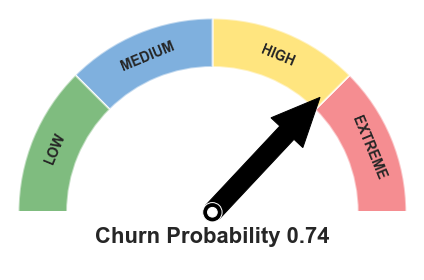

In [389]:
gauge(Probability=model_rf.predict_proba(X_test.iloc[0:1])[0,1], model_name="rf")

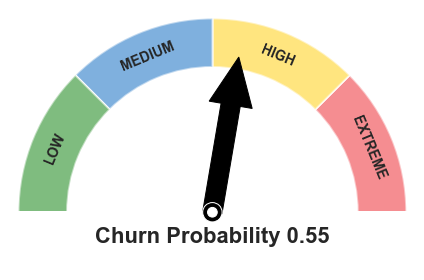

In [390]:
gauge(Probability=model_mlp.predict_proba(X_test.iloc[0:1])[0,1], model_name="mlp")

**END OF PROJECT**